In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from  sklearn.metrics import mean_squared_error
from  sklearn.metrics import r2_score

In [7]:
#impport data
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
#impport data
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
data.shape

(35, 2)

In [9]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


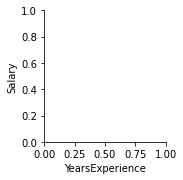

In [10]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data)

In [11]:
# checking the correlation of the data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


In [12]:
X = data['YearsExperience']
y = data['Salary']

In [13]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
X_train.shape

(24,)

In [15]:
X_test.shape

(11,)

In [16]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     553.6
Date:                Tue, 18 May 2021   Prob (F-statistic):           4.36e-17
Time:                        12:02:43   Log-Likelihood:                -241.38
No. Observations:                  24   AIC:                             486.8
Df Residuals:                      22   BIC:                             489.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.487e+04   2653.034     

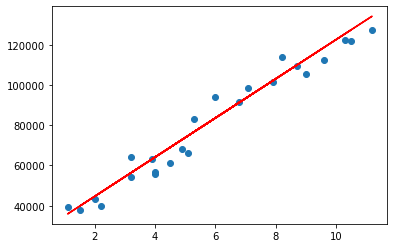

In [21]:
# Let us show the line fitting:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()


In [20]:

y_train_pred = model.predict(X_train_sm)

In [22]:
y_train_pred.head()

19     82000.900088
0      35340.518419
27    116281.996824
12     62955.846346
11     62955.846346
dtype: float64

In [23]:

residual = (y_train - y_train_pred)

In [24]:
residual.head()

19    11939.099912
0      4002.481581
27    -3646.996824
12    -5998.846346
11    -7161.846346
dtype: float64

C:\Users\Beenu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

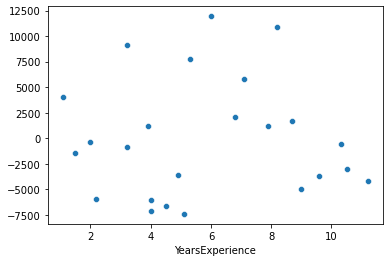

In [29]:
sns.scatterplot(X_train,residual)

In [30]:
X_test_sm = sm.add_constant(X_test)

In [31]:
y_pred = model.predict(X_test_sm)

In [32]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

8383.340691901936

In [33]:
r2_score(y_test,y_pred)

0.9457355647537332

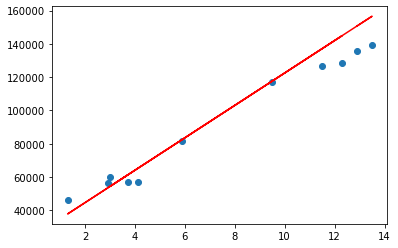

In [34]:
# Let us show the line fitting:
plt.scatter(X_test,y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()